# Ejercicio:

Se va a tratar de aplicar una clusterización y un algoritmo predictivo al conjunto de datos 'Cervezas.csv'

## Lectura de Datos y EDA

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import openpyxl

import plotly as py
import plotly.express as px
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT
import seaborn as sns

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as Arbol
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import roc_curve, auc

/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_11276/3619493324.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 2. Importar datos
df_cervezas = pd.read_csv('Cervezas.csv')
df_cervezas

,id. cervecera,nombre cervecera,fecha encuesta,nota global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volument de alcohol,id. cerveza;;;;
0,1075,Caldera Brewing Company,1.210469e+09,4.0,4.0,4.5,Wasatch,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414;;;;
1,1075,Caldera Brewing Company,1.299617e+09,2.5,3.5,4.0,Thorpe429,American Pale Ale (APA),2.0,2.5,Caldera Pale Ale,5.50,25414;;;;
2,1075,Caldera Brewing Company,1.262623e+09,4.5,3.5,3.5,rfgetz,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414;;;;
3,1075,Caldera Brewing Company,1.281982e+09,4.0,4.0,4.0,Brent,American IPA,4.0,4.0,Caldera IPA,6.10,10784;;;;
4,1075,Caldera Brewing Company,1.280541e+09,5.0,4.0,4.5,JohnQVegas,American IPA,4.5,5.0,Caldera IPA,6.10,10784;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,3835,Drake's Brewing Co.,1.238419e+09,4.5,4.0,4.0,ThirdLap,Russian Imperial Stout,4.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172;;;;
15862,3835,Drake's Brewing Co.,1.220863e+09,4.5,3.5,4.0,slayer3604,Russian Imperial Stout,5.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172;;;;
15863,22616,Fiddler's Green Brewing Company,1.184622e+09,2.0,2.5,3.0,TheClassical,English India Pale Ale (IPA),2.0,2.0,Fiddler's Green India Pale Ale,NaN,36515;;;;
15864,10434,Mia & Pia's Pizzeria And Brewhouse,1.100824e+09,5.0,3.5,5.0,RedDiamond,Extra Special / Strong Bitter (ESB),4.0,4.5,Flash Flood ESB,4.80,20811;;;;


### EDA

In [5]:
df_cervezas.columns

Index(['id. cervecera', 'nombre cervecera', 'fecha encuesta', 'nota global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volument de alcohol', 'id_cerveza'],
      dtype='object')

In [6]:
# Se va a limpiar la columna id. cerveza;;;;
df_cervezas.rename(columns={'id. cerveza;;;;': 'id_cerveza'}, inplace=True)

# Eliminar los caracteres ';' de la columna 'id_cerveza'
df_cervezas['id_cerveza'] = df_cervezas['id_cerveza'].str.replace(';', '')

# Mostrar el DataFrame con la columna 'id_cerveza' modificada
print(df_cervezas['id_cerveza'].head())

0    25414
1    25414
2    25414
3    10784
4    10784
Name: id_cerveza, dtype: object


In [7]:
# Otros cambios de nombre a columnas
df_cervezas.rename(columns={'id. cervecera': 'id_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nombre cervecera': 'nombre_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nota global': 'nota_global'}, inplace=True)
df_cervezas.rename(columns={'volument de alcohol': 'volumen_de_alcohol'}, inplace=True)
df_cervezas.columns

Index(['id_cervecera', 'nombre_cervecera', 'fecha encuesta', 'nota_global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volumen_de_alcohol', 'id_cerveza'],
      dtype='object')

In [8]:
df_cervezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cervecera        15866 non-null  object 
 1   nombre_cervecera    15273 non-null  object 
 2   fecha encuesta      15273 non-null  float64
 3   nota_global         15273 non-null  float64
 4   aroma               15273 non-null  float64
 5   aspecto             15273 non-null  float64
 6   encuestado          15271 non-null  object 
 7   estilo              15273 non-null  object 
 8   paladar             15273 non-null  float64
 9   gusto               15273 non-null  float64
 10  nombre              15273 non-null  object 
 11  volumen_de_alcohol  14644 non-null  float64
 12  id_cerveza          15273 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.6+ MB


In [9]:
# Se van a analizar los nulos
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

nombre_cervecera       593
fecha encuesta         593
nota_global            593
aroma                  593
aspecto                593
encuestado             595
estilo                 593
paladar                593
gusto                  593
nombre                 593
volumen_de_alcohol    1222
id_cerveza             593
dtype: int64


In [10]:
df_cervezas[df_cervezas['nombre_cervecera'].isnull()]

,id_cervecera,nombre_cervecera,fecha encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
22,"1463,Harboes Bryggeri A/S,1178050474,3.5,3.0,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"1386,Harmon Restaurant & Brewery,1160977767,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,"12224,Rinkuškiai Alaus Darykloje,1265079747,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,"14,Cambridge Brewing Company,1095126669,3.0,4....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,"1,""Plzensky Prazdroj, a. s."",1092433034,4.5,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,"259,Brouwerij St. Bernardus NV,1192767803,4.0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15116,"259,Brouwerij St. Bernardus NV,1157181015,4.5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15473,"4712,""Brewhouse, The"",1290714731,3.0,3.0,3.5,t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15474,"4712,""Brewhouse, The"",1225669190,3.0,3.0,4.0,r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Viendo los 593 registros que son nulos en todas las columnas excepto en la primera (id_cervecera), se saca la conclusión de que esto se debe a que no se han leído bien los datos de estos valores. 

Se va a optar por pasar el .csv al formato .xls (Excel) y leer de nuevo los datos para verificar si esto se soluciona.

In [11]:
# Lectura de nuevo del conjunto de datos
df_cervezas = pd.read_excel('Cervezas.xlsx')
df_cervezas

,id. cervecera,nombre cervecera,fecha encuesta,nota global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volument de alcohol,id. cerveza
0,1075,Caldera Brewing Company,1.210469e+09,4.0,4.0,4.5,Wasatch,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414.0
1,1075,Caldera Brewing Company,1.299617e+09,2.5,3.5,4.0,Thorpe429,American Pale Ale (APA),2.0,2.5,Caldera Pale Ale,5.50,25414.0
2,1075,Caldera Brewing Company,1.262623e+09,4.5,3.5,3.5,rfgetz,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.50,25414.0
3,1075,Caldera Brewing Company,1.281982e+09,4.0,4.0,4.0,Brent,American IPA,4.0,4.0,Caldera IPA,6.10,10784.0
4,1075,Caldera Brewing Company,1.280541e+09,5.0,4.0,4.5,JohnQVegas,American IPA,4.5,5.0,Caldera IPA,6.10,10784.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,3835,Drake's Brewing Co.,1.238419e+09,4.5,4.0,4.0,ThirdLap,Russian Imperial Stout,4.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172.0
15862,3835,Drake's Brewing Co.,1.220863e+09,4.5,3.5,4.0,slayer3604,Russian Imperial Stout,5.0,4.5,Drake's Drakonic Imperial Stout,8.75,12172.0
15863,22616,Fiddler's Green Brewing Company,1.184622e+09,2.0,2.5,3.0,TheClassical,English India Pale Ale (IPA),2.0,2.0,Fiddler's Green India Pale Ale,NaN,36515.0
15864,10434,Mia & Pia's Pizzeria And Brewhouse,1.100824e+09,5.0,3.5,5.0,RedDiamond,Extra Special / Strong Bitter (ESB),4.0,4.5,Flash Flood ESB,4.80,20811.0


In [17]:
# Otros cambios de nombre a columnas
df_cervezas.rename(columns={'id. cervecera': 'id_cervecera'}, inplace=True)
df_cervezas.rename(columns={'fecha encuesta': 'fecha_encuesta'}, inplace=True)
df_cervezas.rename(columns={'nombre cervecera': 'nombre_cervecera'}, inplace=True)
df_cervezas.rename(columns={'nota global': 'nota_global'}, inplace=True)
df_cervezas.rename(columns={'volument de alcohol': 'volumen_de_alcohol'}, inplace=True)
df_cervezas.rename(columns={'id. cerveza': 'id_cerveza'}, inplace=True)
df_cervezas.columns

Index(['id_cervecera', 'nombre_cervecera', 'fecha_encuesta', 'nota_global',
       'aroma', 'aspecto', 'encuestado', 'estilo', 'paladar', 'gusto',
       'nombre', 'volumen_de_alcohol', 'id_cerveza'],
      dtype='object')

#### Tratamiento nulos

In [18]:
# Se vuelven a analizar los nulos
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

fecha_encuesta         17
nota_global            17
aroma                  17
aspecto                17
encuestado             19
estilo                 17
paladar                17
gusto                  17
nombre                 17
volumen_de_alcohol    683
id_cerveza             22
dtype: int64


In [19]:
# Se verifica que los 17 registros son nulos en todos las variables
df_cervezas[df_cervezas['fecha_encuesta'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
535,20810,Vilkmerg&#279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2423,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2425,1730,Karlova&#267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3969,16331,Banjalu&#269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3970,16331,Banjalu&#269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6885,580,Browar &#321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7925,11206,Pivovar Podkov√°&#328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12659,5509,Browary Warmi&#324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13578,2438,Browar Namys&#322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Se van a eliminar estos 17 registros
df_cervezas = df_cervezas.dropna(subset=['fecha_encuesta'])
null_counts = df_cervezas.isnull().sum()
print(null_counts[null_counts > 0])

encuestado              2
volumen_de_alcohol    666
id_cerveza              5
dtype: int64


In [21]:
# Se estudian los nulos de 'encuestado'
df_cervezas[df_cervezas['encuestado'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
2093,264,Oy Sinebrychoff Ab,1.231727e+09,4.0,3.5,4.0,NaN,Baltic Porter,4.0,3.5,Sinebrychoff Porter,7.2,2758.0
10444,39,Privatbrauerei Franz Inselkammer KG / Brauerei...,1.073494e+09,5.0,4.5,4.5,NaN,Doppelbock,4.5,5.0,Ayinger Celebrator Doppelbock,6.7,131.0


In [22]:
# Reemplazar nulos en 'encuestado' por 'Desconocido'
df_cervezas['encuestado'].fillna('Desconocido', inplace=True)

/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_11276/814556300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas['encuestado'].fillna('Desconocido', inplace=True)
/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_11276/814556300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cervezas['encuestado'].fil

In [24]:
# Se estudian los nulos de 'id_cerveza'
df_cervezas[df_cervezas['id_cerveza'].isnull()]

,id_cervecera,nombre_cervecera,fecha_encuesta,nota_global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volumen_de_alcohol,id_cerveza
6242,16197,Pivovar Rohozec,1.250595e+09,2.5,3.0,3.5,stcules,Euro Dark Lager,2.5,2.5,Rohozec Skal√°k &#344,NaN,NaN
10348,1382,Aldaris,1.272303e+09,2.5,3.0,4.0,atis,Euro Pale Lager,2.5,3.0,D&#363,NaN,NaN
11220,14718,The Brew Keeper,1.243303e+09,3.5,3.5,3.5,beveritt,Milk / Sweet Stout,3.0,3.5,Brew Keeper 2Ch&#8322,NaN,NaN
14224,18153,SIA Alus Nams,1.244374e+09,3.5,4.0,4.0,atis,Euro Pale Lager,4.0,3.5,Br&#257,NaN,NaN
15782,9346,Pivovar Svijany,1.238923e+09,3.5,3.0,3.5,stcules,Czech Pilsener,3.0,3.5,Svijany Kvasni&#269,NaN,NaN


In [26]:
# Se eliminan los nulos de 'id_cerveza' ya que son muy pocos
df_cervezas = df_cervezas.dropna(subset=['id_cerveza'])

In [28]:
# Para los nulos de 'volumen_de_alcohol' se reemplazarán por la mediana, ya que son muchos registros.

# Calcular la mediana o la media de la columna 'volumen_de_alcohol'
volumen_medio = df_cervezas['volumen_de_alcohol'].median()  # O puedes usar .mean() si prefieres la media

# Reemplazar los valores nulos por la mediana o la media
df_cervezas['volumen_de_alcohol'].fillna(volumen_medio, inplace=True)

# Verificar que se hayan reemplazado los valores nulos
print(df_cervezas.isnull().sum())

id_cervecera          0
nombre_cervecera      0
fecha_encuesta        0
nota_global           0
aroma                 0
aspecto               0
encuestado            0
estilo                0
paladar               0
gusto                 0
nombre                0
volumen_de_alcohol    0
id_cerveza            0
dtype: int64


/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_11276/1004172010.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas['volumen_de_alcohol'].fillna(volumen_medio, inplace=True)


#### Transformaciones y/o eliminado de columnas 

In [31]:
# La columna fecha_encuesta está en un formato incorrecto
df_cervezas['fecha_encuesta'] = pd.to_datetime(df_cervezas['fecha_encuesta'], unit='s')

# Verificar el resultado
print(df_cervezas['fecha_encuesta'])

0       2008-05-11 01:17:24
1       2011-03-08 20:37:34
2       2010-01-04 16:42:46
3       2010-08-16 18:01:41
4       2010-07-31 01:51:03
                ...        
15861   2009-03-30 13:22:35
15862   2008-09-08 08:40:30
15863   2007-07-16 21:42:44
15864   2004-11-19 00:33:17
15865   2007-05-18 01:39:57
Name: fecha_encuesta, Length: 15844, dtype: datetime64[ns]


In [37]:
# Eliminación de columnas que no interesan
df_cervezas = df_cervezas.drop(['nombre_cervecera', 'encuestado', 'nombre'], axis=1)

In [40]:
# Variables categóricas -> Encoder
label_encoder = LabelEncoder()
df_cervezas_encoder = df_cervezas.copy()
# Aplicar el LabelEncoder a la columna 'estilo'
df_cervezas_encoder['estilo'] = label_encoder.fit_transform(df_cervezas['estilo'])
print(df_cervezas_encoder['estilo'])

0        14
1        14
2        14
3        12
4        12
         ..
15861    89
15862    89
15863    46
15864    55
15865    47
Name: estilo, Length: 15844, dtype: int64


#### Visualizaciones

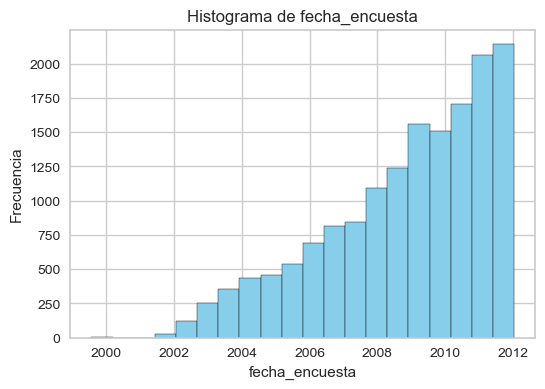

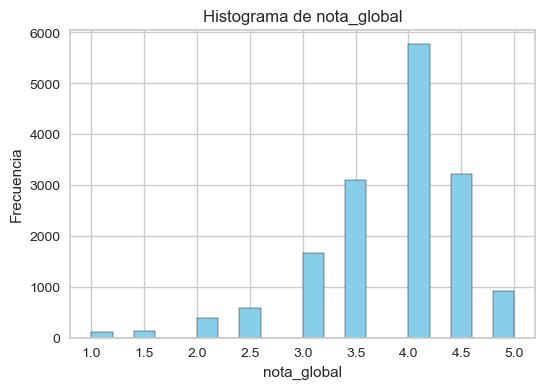

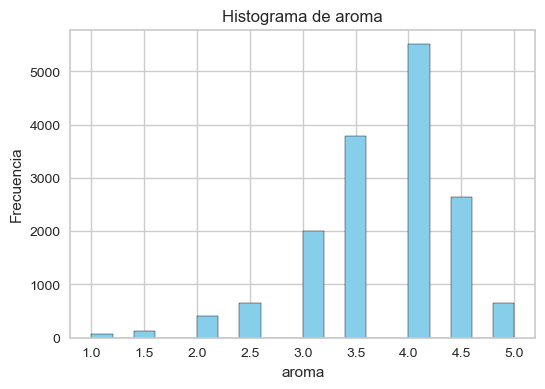

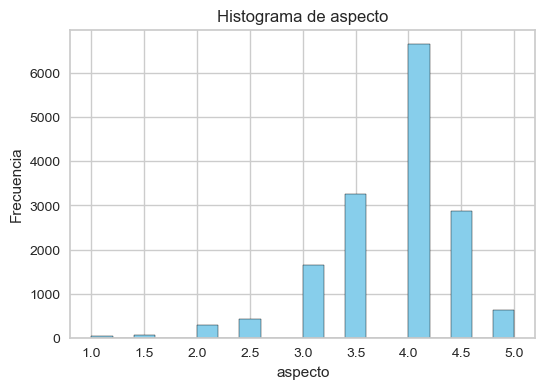

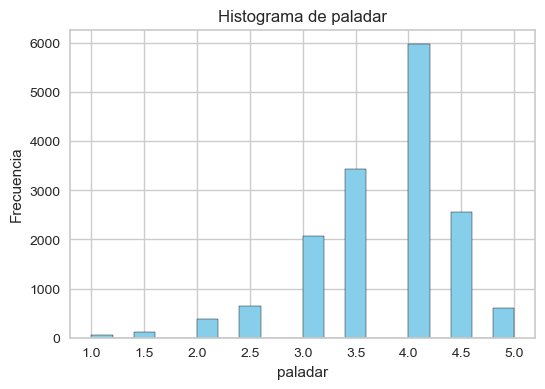

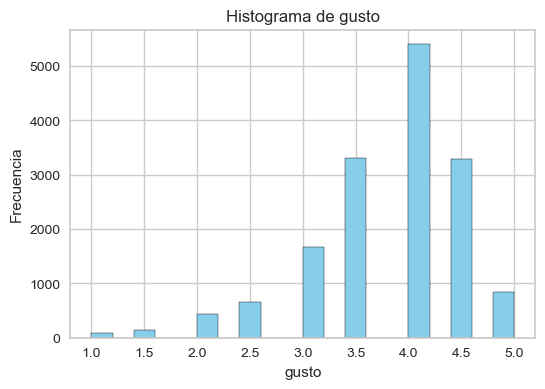

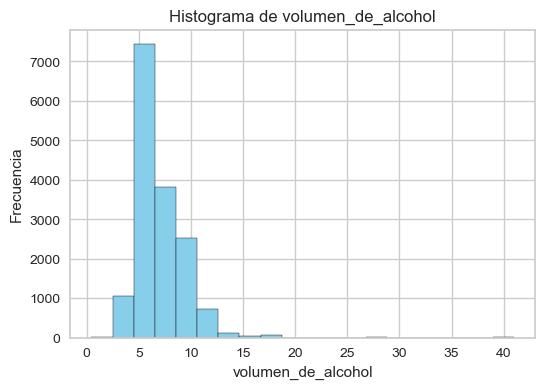

In [42]:
# Visualizar un histograma de las columnas de interés

columns_to_plot = ['fecha_encuesta', 'nota_global', 'aroma', 'aspecto', 'paladar', 'gusto', 'volumen_de_alcohol']

# Iterar sobre las columnas y crear un histograma para cada una
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df_cervezas_encoder[column], bins=20, color='skyblue', edgecolor='black')  # Crear el histograma
    plt.title(f'Histograma de {column}')  # Título del histograma
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.grid(True)  # Activar la cuadrícula
    plt.show()  # Mostrar el histograma

#### Correlaciones

In [51]:
# Calcular la matriz de correlación
corr_matrix = df_cervezas_encoder.corr()

# Filtrar la diagonal superior
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_upper

,id_cervecera,fecha_encuesta,nota_global,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza
id_cervecera,NaN,0.212621,-0.004613,0.024748,0.003765,-0.067545,0.004462,0.000996,0.070666,0.414335
fecha_encuesta,NaN,NaN,0.013763,0.047202,0.050209,-0.056306,0.043750,0.028981,0.138634,0.461889
nota_global,NaN,NaN,NaN,0.616904,0.504507,-0.016721,0.702421,0.790531,0.126239,-0.000219
aroma,NaN,NaN,NaN,NaN,0.571499,-0.013799,0.614765,0.713489,0.313064,0.071359
aspecto,NaN,NaN,NaN,NaN,NaN,-0.025580,0.558834,0.549290,0.257623,0.061760
estilo,NaN,NaN,NaN,NaN,NaN,NaN,-0.009743,-0.013477,-0.068582,-0.082702
paladar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729384,0.258675,0.044025
gusto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266151,0.023583
volumen_de_alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189856
id_cerveza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
corr_upper

,id_cervecera,fecha_encuesta,nota_global,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza
id_cervecera,NaN,0.212621,-0.004613,0.024748,0.003765,-0.067545,0.004462,0.000996,0.070666,0.414335
fecha_encuesta,NaN,NaN,0.013763,0.047202,0.050209,-0.056306,0.043750,0.028981,0.138634,0.461889
nota_global,NaN,NaN,NaN,0.616904,0.504507,-0.016721,0.702421,0.790531,0.126239,-0.000219
aroma,NaN,NaN,NaN,NaN,0.571499,-0.013799,0.614765,0.713489,0.313064,0.071359
aspecto,NaN,NaN,NaN,NaN,NaN,-0.025580,0.558834,0.549290,0.257623,0.061760
estilo,NaN,NaN,NaN,NaN,NaN,NaN,-0.009743,-0.013477,-0.068582,-0.082702
paladar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729384,0.258675,0.044025
gusto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266151,0.023583
volumen_de_alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189856
id_cerveza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clustering

In [43]:
df_cervezas_encoder

,id_cervecera,fecha_encuesta,nota_global,aroma,aspecto,estilo,paladar,gusto,volumen_de_alcohol,id_cerveza
0,1075,2008-05-11 01:17:24,4.0,4.0,4.5,14,4.0,4.0,5.50,25414.0
1,1075,2011-03-08 20:37:34,2.5,3.5,4.0,14,2.0,2.5,5.50,25414.0
2,1075,2010-01-04 16:42:46,4.5,3.5,3.5,14,4.0,4.0,5.50,25414.0
3,1075,2010-08-16 18:01:41,4.0,4.0,4.0,12,4.0,4.0,6.10,10784.0
4,1075,2010-07-31 01:51:03,5.0,4.0,4.5,12,4.5,5.0,6.10,10784.0
...,...,...,...,...,...,...,...,...,...,...
15861,3835,2009-03-30 13:22:35,4.5,4.0,4.0,89,4.0,4.5,8.75,12172.0
15862,3835,2008-09-08 08:40:30,4.5,3.5,4.0,89,5.0,4.5,8.75,12172.0
15863,22616,2007-07-16 21:42:44,2.0,2.5,3.0,46,2.0,2.0,6.50,36515.0
15864,10434,2004-11-19 00:33:17,5.0,3.5,5.0,55,4.0,4.5,4.80,20811.0


In [53]:
# El primer paso será normalizar las variables

df_cervezas_encoder_normalize = df_cervezas_encoder.copy()

# Se elimina la variable fecha_encuesta
df_cervezas_encoder_normalize = df_cervezas_encoder_normalize.drop(columns=['fecha_encuesta'])
df_cervezas_encoder_normalize = preprocessing.normalize(df_cervezas_encoder_normalize)


In [54]:
df_cervezas_encoder_normalize

array([[4.22617183e-02, 1.57252905e-04, 1.57252905e-04, ...,
        1.57252905e-04, 2.16222745e-04, 9.99106334e-01],
       [4.22617196e-02, 9.82830689e-05, 1.37596296e-04, ...,
        9.82830689e-05, 2.16222751e-04, 9.99106365e-01],
       [4.22617186e-02, 1.76909520e-04, 1.37596293e-04, ...,
        1.57252906e-04, 2.16222746e-04, 9.99106340e-01],
       ...,
       [5.26547454e-01, 4.65641541e-05, 5.82051926e-05, ...,
        4.65641541e-05, 1.51333501e-04, 8.50145043e-01],
       [4.48191401e-01, 2.14774488e-04, 1.50342141e-04, ...,
        1.93297039e-04, 2.06183508e-04, 8.93934373e-01],
       [3.92506485e-01, 1.36676121e-04, 1.23008509e-04, ...,
        1.23008509e-04, 1.36676121e-04, 9.19748290e-01]])

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/sklearn/cluster/_kmeans.

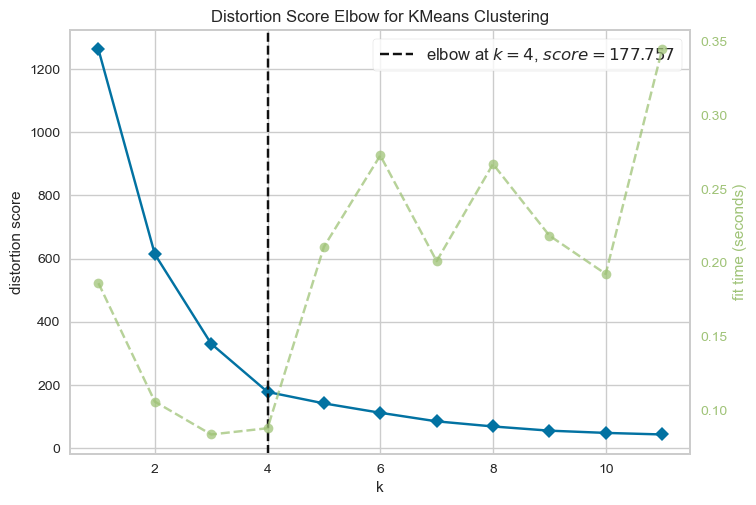

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_cervezas_encoder_normalize)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen